In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
medical_df = pd.read_csv('drive/MyDrive/2025HP/03_Supervised_Learning/2025-06-06 Аналіз ознак для побудови лінійної регресії/medical-charges.csv')
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1. Чим нижчий "bmi", тим вищі "charges"
2. У людей з "northwest" виплати вище ніж у людей з "southwest" при приблизно однакових "bmi"
3. Наявність дітей сприяє нижчим "charges"
4. За приблизно рівних "bmi", старший вік призводить до майже в 2.5-3 рази менших "charges" на кожні 10 років


**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [4]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

- На гістограмі видно, що чоловіки (сірий колір) мають ширше представлення серед високих значень charges $-$ у правому "хвості" більше сірих стовпців.

- Жінки (зелений колір) домінують у нижньому діапазоні (до $\$$10-15k), але майже не представлені серед значень понад $\$$40,000.

- На маржинальному бокс-плоті угорі:
 - У чоловіків - бокс вужчий, з більш довгим хвостом праворуч.
 - У жінок - бокс трохи ширший, але без такого вираженого "правого хвоста".

- Тобто розподіл зборів у чоловіків має більше винятково великих значень, ніж у жінок.

- Візуально медіани виглядають майже однаковими, хоча бокс-плот жінок трохи зміщений лівіше.

In [5]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'grey', 'blue', 'red'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

- Основна маса клієнтів у всіх регіонах має щорічні медичні витрати до $\$$15,000 $-$ саме в цьому діапазоні найвищі стовпці гістограми.

- Регіон southeast (синій) має найбільшу загальну кількість клієнтів $-$ видно з того, що синій колір переважає в більшості стовпців лівої частини графіка.

- Регіони northeast (червоний) та northwest (сірий) більш представлені серед клієнтів із високими витратами (від $\$$30,000 до $\$$60,000). Це видно за кольорами у правому "хвості" гістограми та відповідними точками на бокс-плоті.

- Southwest (зелений) має найнижчу медіану витрат, вузький діапазон і невелику кількість клієнтів із високими медичними рахунками.

- Бокс-плоти угорі підтверджують:

 - northeast має найвищу медіану та найбільшу кількість викидів (outliers),

 - southwest $-$ найнижчу медіану та найменшу дисперсію.

Таким чином, існує чітка регіональна варіативність у медичних витратах.
Southeast $-$ наймасовіший регіон, але не найдорожчий.
Найвищі витрати характерні для northeast та northwest.
Southwest $-$ регіон із найнижчою медіаною витрат і меншою дисперсією, згідно з бокс-плотом.

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [6]:
fig = px.histogram(
    medical_df,
    x="region",
    color="smoker",
    barmode="group",
    title="Розподіл клієнтів за регіоном і статусом курця",
    labels={"region": "Регіон", "count": "Кількість клієнтів", "smoker": "Курець"},
    category_orders={"region": ["southwest", "southeast", "northwest", "northeast"]}
)

fig.update_layout(xaxis_title="Регіон", yaxis_title="Кількість клієнтів")
fig.show()

У всіх регіонах кількість некурців значно переважає над курцями.
Найбільше курців $-$ у southwest та southeast, найменше $-$ у northwest.

In [7]:
fig = px.histogram(
    medical_df,
    x="children",
    color="smoker",
    barmode="group",
    title="Розподіл кількості дітей у клієнтів за статусом курця",
    labels={"children": "Кількість дітей", "count": "Кількість клієнтів", "smoker": "Курець"}
)

fig.update_layout(xaxis_title="Кількість дітей", yaxis_title="Кількість клієнтів")
fig.show()

Найбільше курців і некурців — серед клієнтів без дітей. Однак серед тих, хто має 3 дитини, частка курців вища, ніж у групах із 1 або 2 дітьми.
Тобто, хоча курців з трьома дітьми загалом менше, їх частка в цій групі — помітно більша.

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [8]:
fig_violin = px.violin(
    medical_df,
    x='children',
    y='charges',
    box=True,
    points='all',
    title='Звʼязок між медичними витратами (charges) та кількістю дітей (children)',
    labels={'children': 'Кількість дітей', 'charges': 'Медичні витрати'}
)

fig_violin.show()

- Найбільша кількість спостережень припадає на клієнтів із 0–2 дітьми, що видно з ширших скрипок і більш щільного розміщення точок.

- Медіанні витрати (charges) залишаються приблизно на одному рівні в усіх категоріях children, що свідчить про відсутність явного впливу кількості дітей на медичні витрати.

- В усіх категоріях видно велику варіативність значень (довгі "хвости"), включно з високими викидами понад $\$$40k–$\$$60k.

- У групах із 4 і 5 дітьми вибірка значно менша, тому розподіл менш стабільний.

- Загалом кількість дітей не є предиктором, який суттєво пояснює зміну charges, принаймні у вигляді окремої змінної.

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [9]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [10]:
def estimate_charges(age, w, b):
    return w * age + b

In [11]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

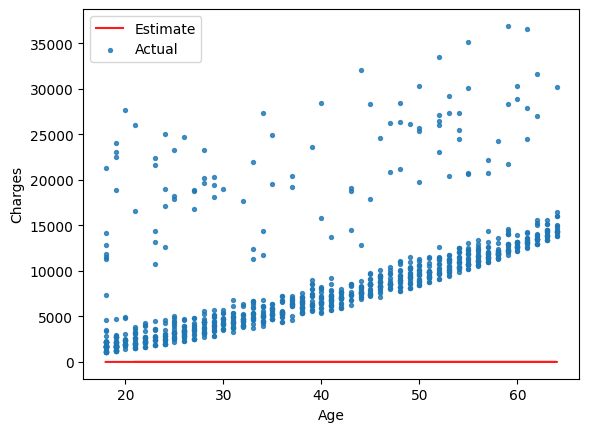

In [12]:
try_parameters(non_smoker_df, 0, 1)

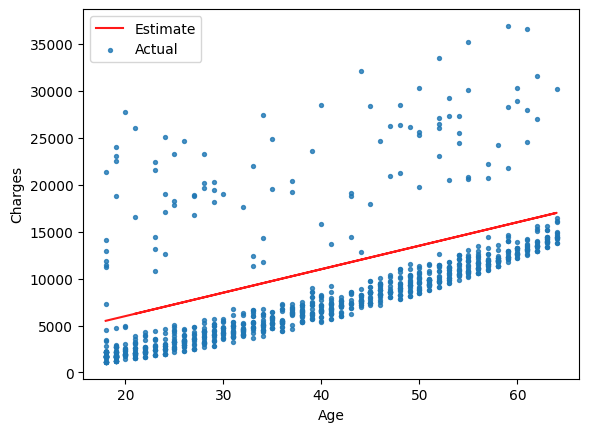

In [13]:
try_parameters(non_smoker_df, 250, 1000)

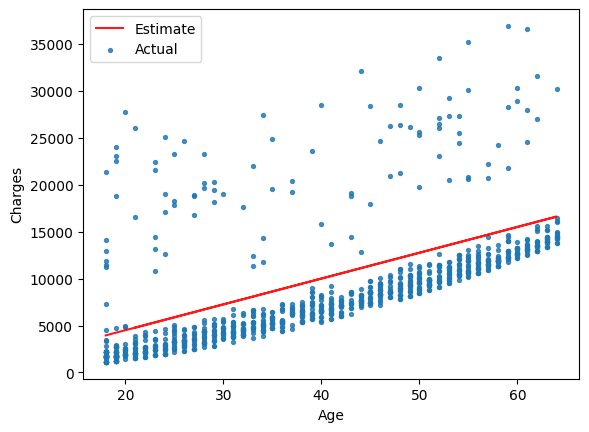

In [14]:
try_parameters(non_smoker_df, 275, -1000)

- Обрана мною модель має коефіцієнт нахилу $\omega = 275,$ що задає помірну лінійну залежність витрат від віку. Така оцінка частково відображає загальну тенденцію зростання charges з віком.

- Зміщення $b=-1000$ було обрано для наближення початкових прогнозів до реальних витрат молодших клієнтів, але цього виявилося недостатньо $-$ лінія все ще розташована нижче більшості точок у молодому віці.

- Модель явно недооцінює великі значення витрат у середньому та старшому віці $-$ спостерігається систематичне відхилення у верхній частині графіка.

- Незважаючи на це, модель доволі стабільно відображає загальний тренд і дає непогане наближення для "середньої" частини вибірки.

- Велика дисперсія фактичних значень навколо червоної лінії вказує на необхідність розширення моделі $-$ додавання інших ознак, зокрема bmi, children, region, тощо.

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [15]:
def rmse(df, absc, ord, w, b):
  x = df[absc].values
  y = df[ord].values
  y_pred = w * x + b
  mse = np.mean((y - y_pred) ** 2)
  return float(np.sqrt(mse))

In [16]:
rmse(non_smoker_df, 'age', 'charges', w = 275, b = -1000)

4868.432529426544

Для вибіркі $\{(x_i, y_i)\}_{i=1}^N \subset \mathbb{R}^2$ покладемо:
$$
\begin{aligned}
&A := \sum_{i=1}^N y_i^2, \quad
B := \sum_{i=1}^N x_i^2, \quad
C := \sum_{i=1}^N y_i, \quad
D := \sum_{i=1}^N x_i, \quad
E := \sum_{i=1}^N x_i y_i,\\
&\bar{x} := \frac{D}{N}, \quad \bar{y} := \frac{C}{N}, \quad
S_{xx} := B - \frac{D^2}{N}, \quad
S_{xy} := E - \frac{DC}{N}.
\end{aligned}
$$
Тоді виконується тотожність:
$$
\sum_{i=1}^N (y_i - \omega x_i - b)^2 = N(b - \bar{y} + \omega \bar{x})^2
+ S_{xx}\left(\omega - \frac{S_{xy}}{S_{xx}}\right)^2
+ A - N\bar{y}^2 - \frac{S_{xy}^2}{S_{xx}}.
$$
Зауважимо, що мінімум по $(\omega,b)$ досягається на:
$$
\omega_* = \frac{S_{xy}}{S_{xx}}, \quad
b_* = \bar{y} - \omega_* \bar{x},
$$
а сам мінімум дорівнює
$$
A - N\bar{y}^2 - \frac{S_{xy}^2}{S_{xx}}.
$$

Таким чином, знайдемо оптимальні значення $\omega_*$ та $b_*$:

In [17]:
def lra(df, absc, ord):
    x = df[absc].values
    y = df[ord].values
    N = len(x)

    A = np.sum(y**2)
    B = np.sum(x**2)
    C = np.sum(y)
    D = np.sum(x)
    E = np.sum(x * y)

    x_bar = D / N
    y_bar = C / N

    S_xx = B - D**2 / N
    S_xy = E - D * C / N

    omega = S_xy / S_xx
    b = y_bar - omega * x_bar

    return omega, b

In [18]:
(w, b) = lra(non_smoker_df, 'age', 'charges')
w, b

(np.float64(267.2489128311996), np.float64(-2091.4205565650846))

Найнижче значення втрат, яке можна досягти, дорівнює:

In [19]:
rmse(non_smoker_df, 'age', 'charges', w, b)

4662.505766636395

Метод проб і помилок з ітеративним оновленням:
$$
\theta^{(t+1)} = \theta^{(t)} + \eta \cdot \left( \theta_{\text{target}}^{(t)} - \theta^{(t)} \right),
$$
де:
- $\theta \in \{w, b\}$ $-$ поточна оцінка параметра,
- $\theta_{\text{target}}^{(t)}$ $-$ ``цільове'' значення (наближення до ідеального значення),
- $\eta \in (0,1]$ $-$ крок або швидкість навчання,
- $ t $ $-$ номер ітерації.

Це оновлення є опуклою комбінацією старого значення та ``цільового'':
$$
\theta^{(t+1)} = (1 - \eta)\theta^{(t)} + \eta \cdot \theta_{\text{target}}^{(t)}.
$$
У випадку, коли ми не знаємо точного значення $\theta_{\text{target}},$ його можна замінити наближеним напрямком покращення, наприклад, кроком у напрямку градієнта функції втрат.
